In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


from keras.layers import Dense, LSTM, Flatten

print(tf.__version__)

2.3.0


In [136]:
# Semilla de aleatoriedad del experimento.
tf.random.set_seed(7)

In [137]:
# Carga del dataset.
dataframe = pd.read_csv('mayores_65.csv', sep=";", usecols=[1], engine='python')
dataset = dataframe.values
values = dataset.astype('float32')

In [139]:
PASOS=6

# ajuste de la serie para formato de LSTM

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [140]:
# formato LSTM
reframed = series_to_supervised(values, PASOS, 1)
reframed.head()

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
6,3002401.0,3042951.0,3087382.0,3126577.0,3175484.0,3208855.0,3255213.0
7,3042951.0,3087382.0,3126577.0,3175484.0,3208855.0,3255213.0,3298507.0
8,3087382.0,3126577.0,3175484.0,3208855.0,3255213.0,3298507.0,3342025.0
9,3126577.0,3175484.0,3208855.0,3255213.0,3298507.0,3342025.0,3378753.0
10,3175484.0,3208855.0,3255213.0,3298507.0,3342025.0,3378753.0,3427756.0


In [141]:
# separación en datos de test y entrenamiento del modelo
values = reframed.values
n_train_days = 103 - (7+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# separación en entradas y salidas
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reformulación 3D vectores para LSTM
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(90, 1, 6) (90,) (7, 1, 6) (7,)


In [142]:
# Definición del modelo

def crear_modeloFF():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, PASOS)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    return model

In [143]:
# Definición del número de epochs de entrenamiento del modelo.

EPOCHS=200


model = crear_modeloFF()

#Entrenamiento del modelo

history=model.fit(x_train,y_train,epochs=200)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50)                11400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3/3 [==============================] - 0s 1ms/step - loss: 42725290278912.0000
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 40849102602240.0000
Epoch 3/200
3/3 [==============================] - 0s 1ms/step - loss: 39024634888192.0000
Epoch 4/200
3/3 [==============================] - 0s 1ms/step - loss: 37288339832832.0000
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 35563046436864.0000
Epoch 6/200
3/3 [==============================] - 0s 1ms

3/3 [==============================] - 0s 2ms/step - loss: 3353686784.0000
Epoch 86/200
3/3 [==============================] - 0s 1ms/step - loss: 3354831616.0000
Epoch 87/200
3/3 [==============================] - 0s 2ms/step - loss: 3353086720.0000
Epoch 88/200
3/3 [==============================] - 0s 1ms/step - loss: 3352699904.0000
Epoch 89/200
3/3 [==============================] - 0s 2ms/step - loss: 3352400896.0000
Epoch 90/200
3/3 [==============================] - 0s 1ms/step - loss: 3352598272.0000
Epoch 91/200
3/3 [==============================] - 0s 1ms/step - loss: 3352105216.0000
Epoch 92/200
3/3 [==============================] - 0s 1ms/step - loss: 3353842688.0000
Epoch 93/200
3/3 [==============================] - 0s 1ms/step - loss: 3352878848.0000
Epoch 94/200
3/3 [==============================] - 0s 1000us/step - loss: 3352423936.0000
Epoch 95/200
3/3 [==============================] - 0s 1ms/step - loss: 3352274176.0000
Epoch 96/200
3/3 [========================

3/3 [==============================] - 0s 1ms/step - loss: 3351029248.0000
Epoch 178/200
3/3 [==============================] - 0s 1ms/step - loss: 3351899904.0000
Epoch 179/200
3/3 [==============================] - 0s 1ms/step - loss: 3352313856.0000
Epoch 180/200
3/3 [==============================] - 0s 1ms/step - loss: 3351607808.0000
Epoch 181/200
3/3 [==============================] - 0s 1ms/step - loss: 3351072000.0000
Epoch 182/200
3/3 [==============================] - 0s 2ms/step - loss: 3352375808.0000
Epoch 183/200
3/3 [==============================] - 0s 1ms/step - loss: 3351098880.0000
Epoch 184/200
3/3 [==============================] - 0s 2ms/step - loss: 3352364800.0000
Epoch 185/200
3/3 [==============================] - 0s 1ms/step - loss: 3351352320.0000
Epoch 186/200
3/3 [==============================] - 0s 1ms/step - loss: 3350927872.0000
Epoch 187/200
3/3 [==============================] - 0s 2ms/step - loss: 3351536896.0000
Epoch 188/200
3/3 [================

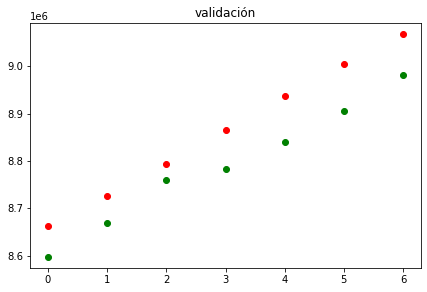

In [155]:
# Comparación de los resultados predichos por el modelo con los resultados reales de la serie.

results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validación')
plt.show()

In [145]:
# Carga de nuevo del dataset.
dataframe_2 = pd.read_csv('mayores_65.csv', sep=";", usecols=[1], engine='python')
dataframe_2 = dataframe_2.values
values_2 = dataframe_2.astype('float32')

In [146]:
# Recogida de los ultimos valores.

values_2 = values_2[-70:]

In [147]:
PASOS = 6

reframed_2 = series_to_supervised(values_2, PASOS, 1)
reframed_2.drop(reframed_2.columns[[6]], axis=1, inplace=True) # Quita la columna que queremos predecir (t).
reframed_2

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
6,4484247.0,4550316.0,4620535.0,4692045.0,4755030.0,4826834.0
7,4550316.0,4620535.0,4692045.0,4755030.0,4826834.0,4890421.0
8,4620535.0,4692045.0,4755030.0,4826834.0,4890421.0,4961389.0
9,4692045.0,4755030.0,4826834.0,4890421.0,4961389.0,5023068.0
10,4755030.0,4826834.0,4890421.0,4961389.0,5023068.0,5094071.0
...,...,...,...,...,...,...
65,8346213.0,8388280.0,8453349.0,8509159.0,8598125.0,8669825.0
66,8388280.0,8453349.0,8509159.0,8598125.0,8669825.0,8759989.0
67,8453349.0,8509159.0,8598125.0,8669825.0,8759989.0,8782735.0
68,8509159.0,8598125.0,8669825.0,8759989.0,8782735.0,8840784.0


In [148]:
values = reframed_2.values
x_test = values[63:, :] #Coge la ultima columna que es equivalente a la ultima fila
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[8598125., 8669825., 8759989., 8782735., 8840784., 8905694.]]],
      dtype=float32)

In [149]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(77):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[8598125. 8669825. 8759989. 8782735. 8840784. 8905694.]]]
[[[8669825. 8759989. 8782735. 8840784. 8905694. 9067169.]]]
[[[8759989. 8782735. 8840784. 8905694. 9067169. 9142675.]]]
[[[8782735. 8840784. 8905694. 9067169. 9142675. 9229226.]]]
[[[8840784. 8905694. 9067169. 9142675. 9229226. 9317766.]]]
[[[8905694. 9067169. 9142675. 9229226. 9317766. 9402808.]]]
[[[9067169. 9142675. 9229226. 9317766. 9402808. 9501439.]]]
[[[9142675. 9229226. 9317766. 9402808. 9501439. 9603652.]]]
[[[9229226. 9317766. 9402808. 9501439. 9603652. 9695265.]]]
[[[9317766. 9402808. 9501439. 9603652. 9695265. 9792398.]]]
[[[9402808. 9501439. 9603652. 9695265. 9792398. 9889540.]]]
[[[9501439. 9603652. 9695265. 9792398. 9889540. 9987301.]]]
[[[ 9603652.  9695265.  9792398.  9889540.  9987301. 10088643.]]]
[[[ 9695265.  9792398.  9889540.  9987301. 10088643. 10189684.]]]
[[[ 9792398.  9889540.  9987301. 10088643. 10189684. 10290801.]]]
[[[ 9889540.  9987301. 10088643. 10189684. 10290801. 10393852.]]]
[[[ 9987301. 100

In [150]:
index = pd.Index(range(103, 180, 1))


prediccion1 = pd.DataFrame(results, index)
prediccion1.columns = ['total']
prediccion1

,total
103,9067169.0
104,9142675.0
105,9229226.0
106,9317766.0
107,9402808.0
...,...
175,18499872.0
176,18684690.0
177,18871356.0
178,19059884.0


In [151]:
dataframe_3 = pd.read_csv('mayores_65.csv', sep=";", usecols=[1], engine='python')
dataframe_3 = dataframe_3.values
values_3 = dataframe_3.astype('float32')
antiguo = pd.DataFrame(values_3)
antiguo.columns = ['total']

In [152]:
frames = [antiguo, prediccion1]

result = pd.concat(frames)

In [153]:
result

result.to_csv('pruebaMayores.csv', mode='a', index=False, header=False)

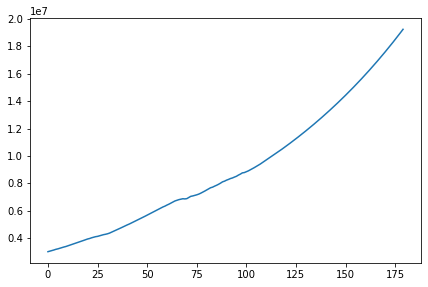

In [154]:

# Se representa conjuntamente los datos obtenidos tras la predicción junto con los datos reales de la serie.

plt.plot(result)
plt.show()